# ANALIZA PODATAKA

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from termcolor import colored

#Ucitavanje podataka:
data = pd.read_csv('speeddating.csv')


<ipython-input-26-322d8f5b5a55>:8: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('speeddating.csv')


Analiza podataka

In [8]:
data.head()


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


Vidimo da imamo 123 atributa, od cega su 122 za predvidjanje, a poslednji atrbut 'match' nam je ciljni atribut

In [11]:
data.columns

Index(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace',
       ...
       'd_expected_num_interested_in_me', 'd_expected_num_matches', 'like',
       'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision',
       'decision_o', 'match'],
      dtype='object', length=123)

Provera nedostajucih vrednosti:

In [9]:
data.isna()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8374,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8375,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8376,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Posto je ovako nepregledno, proveravamo da li u svakoj koloni neka nedostajuca vrednost:

In [10]:
data.isna().any()

has_null              False
wave                  False
gender                False
age                   False
age_o                 False
                      ...  
d_guess_prob_liked    False
met                   False
decision              False
decision_o            False
match                 False
Length: 123, dtype: bool

Odavde zakljucujemo da nema nedostajucih vrednosti

Sledeci korak je podela atributa na one koji sluze za predvidjanje cilja (prvih 122) i ciljni atribut

In [11]:
Y = data['match']
Y

0       0
1       0
2       1
3       1
4       1
       ..
8373    0
8374    0
8375    0
8376    0
8377    0
Name: match, Length: 8378, dtype: int64

In [12]:
X = data.drop('match',axis = 1)
X

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-4],[0-3],[3-5],6,6,[6-8],[5-6],0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,male,25,26,1,[0-1],European/Caucasian-American,'Latino/Hispanic American',0,...,[7-10],[0-3],[3-5],2,5,[0-5],[5-6],0,0,1
8374,1,21,male,25,24,1,[0-1],European/Caucasian-American,Other,0,...,[7-10],[0-3],[3-5],4,4,[0-5],[0-4],0,0,0
8375,1,21,male,25,29,4,[4-6],European/Caucasian-American,'Latino/Hispanic American',0,...,[7-10],[0-3],[3-5],6,5,[6-8],[5-6],0,0,0
8376,1,21,male,25,22,3,[2-3],European/Caucasian-American,'Asian/Pacific Islander/Asian-American',0,...,[7-10],[0-3],[3-5],5,5,[0-5],[5-6],0,0,1


Analiza podataka:

In [13]:
feature_names = X.columns
X.describe()

,has_null,wave,d_age,samerace,decision,decision_o
count,8378.00000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.87491,11.350919,4.185605,0.395799,0.419909,0.419551
std,0.33084,5.995903,4.596171,0.489051,0.493573,0.493515
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,7.000000,1.000000,0.000000,0.000000,0.000000
50%,1.00000,11.000000,3.000000,0.000000,0.000000,0.000000
75%,1.00000,15.000000,5.000000,1.000000,1.000000,1.000000
max,1.00000,21.000000,37.000000,1.000000,1.000000,1.000000


In [14]:
Y.describe()

count    8378.000000
mean        0.164717
std         0.370947
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: match, dtype: float64

In [15]:
Y.unique()

array([0, 1])

Nas ciljni atrbut ima samo dve klase (0 i 1), pa zakljucujemo da se radi o binarnoj klasifikaciji

Zelimo da vidimo kako su raspodeljene klase, odnosno koliko ima istanci prve, a koliko istanci druge klase 

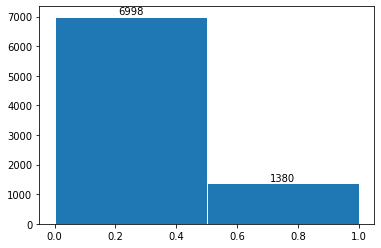

In [18]:
import numpy as np

freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1] # računanje centra korpice

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             # poziciranje broja iznad korpice
               xytext = (0,0.2),             # odvajanje teksta od korpice
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )

plt.show()



Primecujemo da je broj instanci prve klase znatno veci od broja instanci druge klase, sto znaci da je stablo prilicno nebalansirano.

Sada podatke delimo na TRENING i TEST skup. 75% ce biti podaci za trening, dok su 25% podaci za testiranje. Stratify koristimo da se ne bi desilo da u trening skupu imamo samo instance koje pripadaju jednoj klasi, vec da imamo instance iz obe klase

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=12)

In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6283, 122)
(6283,)
(2095, 122)
(2095,)


In [35]:
print(Y_train.unique())
print(Y_train.unique())

[0 1]
[0 1]
